# PCA

## 1. Library Import

In [3]:
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# PCA Model
from sklearn.decomposition import PCA
# Dataset
from sklearn.datasets import fetch_lfw_people
# Scaling of data
from sklearn.preprocessing import StandardScaler

import kagglehub

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load Dataset
###  Climate Change Indicators Dataset

This dataset has climate change indicators for different countries with their associated codes(ISO2 AND ISO3). The measurement has been updated yearly till 2022 from 1961.

In [4]:


# Download latest version
path = kagglehub.dataset_download("tarunrm09/climate-change-indicators")

print("Path to dataset files:", path)
csv=pd.read_csv(f'{path}/climate_change_indicators.csv')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(csv.select_dtypes(include=numerics).columns)
csv = csv[numerical_vars]

data=pd.DataFrame(csv)
data=data.fillna(0)
data

Path to dataset files: C:\Users\Marco\.cache\kagglehub\datasets\tarunrm09\climate-change-indicators\versions\1


,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
223,224,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,0.243,...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


## 3. Correlation Matrix & Variance Analisis

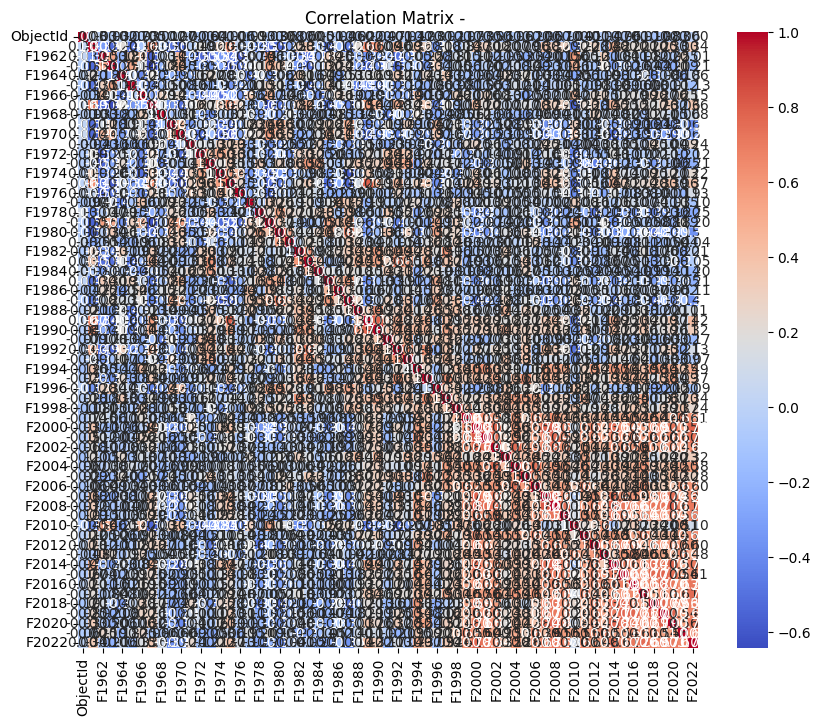

ObjectId    4237.500000
F1961          0.140655
F1962          0.098083
F1963          0.125260
F1964          0.080544
               ...     
F2018          0.423060
F2019          0.312466
F2020          0.496070
F2021          0.313884
F2022          0.520814
Length: 63, dtype: float64


In [5]:
correlation_matrix = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, 
    annot=True, 
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Matrix - ")
plt.show()

print(data.var())

## 4. Standarize features


In [6]:
scaler=StandardScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)


## 5. PCA Algorithm

In [7]:
pca=PCA()
pca.fit(scaled_data)


PCA()

## 6. Principal Components Score

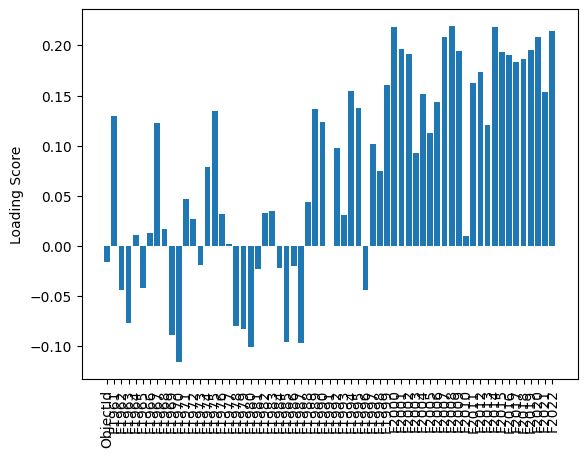

In [8]:
pca_score = pd.DataFrame(
    data=pca.components_,
    columns=data.columns
)

matrix_transform = pca.components_.T
plt.bar(
    np.arange(63),
    matrix_transform[:,0]
)
plt.xticks(
    range(len(data.columns)), 
    data.columns,rotation=90
)
plt.ylabel('Loading Score')
plt.show()

# 7. Get top 3 values

In [9]:
top_vars_per_component = {}
for i in range(pca.n_components_):
    component = pd.Series(pca.components_[i], index=data.columns)
    sorted_component = component.abs().sort_values(ascending=False)
    top_vars_per_component[f'PCA{i+1}'] = sorted_component.index[:3].tolist() 
print("Variables de mayor aporte para los primeros componentes:", top_vars_per_component)

Variables de mayor aporte para los primeros componentes: {'PCA1': ['F2008', 'F2014', 'F2000'], 'PCA2': ['F2010', 'F1962', 'F1979'], 'PCA3': ['F1987', 'F1980', 'F1993'], 'PCA4': ['F1966', 'F1994', 'F1977'], 'PCA5': ['F1972', 'F1981', 'F1965'], 'PCA6': ['F1964', 'F1984', 'F1971'], 'PCA7': ['F1976', 'F1991', 'F1989'], 'PCA8': ['F1986', 'F1974', 'F1995'], 'PCA9': ['ObjectId', 'F1985', 'F1984'], 'PCA10': ['F1978', 'F1982', 'F2005'], 'PCA11': ['F1981', 'F1971', 'ObjectId'], 'PCA12': ['F1976', 'F2002', 'F1963'], 'PCA13': ['ObjectId', 'F1968', 'F1977'], 'PCA14': ['ObjectId', 'F1993', 'F1971'], 'PCA15': ['ObjectId', 'F1977', 'F1969'], 'PCA16': ['ObjectId', 'F1981', 'F1980'], 'PCA17': ['F2013', 'F1972', 'F1971'], 'PCA18': ['F1965', 'ObjectId', 'F1976'], 'PCA19': ['F1988', 'F1984', 'F1969'], 'PCA20': ['F1977', 'F2002', 'F1981'], 'PCA21': ['F1984', 'F2016', 'F1993'], 'PCA22': ['F1999', 'F1968', 'F1996'], 'PCA23': ['F2009', 'F1978', 'F1977'], 'PCA24': ['F1998', 'F1966', 'F1967'], 'PCA25': ['F1965',



## 8. Principal Components 

    ObjectId     F1961     F1962     F1963     F1964     F1965     F1966  \
0  -0.015530  0.130078 -0.044195 -0.077090  0.010889 -0.041423  0.013397   
1  -0.016249 -0.173605  0.244067  0.218609 -0.118925  0.127857  0.186895   
2  -0.019041 -0.046591 -0.049952  0.021229  0.082450 -0.022481 -0.027195   
3  -0.015417  0.191399  0.069216 -0.152207 -0.109161 -0.246757  0.320632   
4  -0.109809 -0.020790  0.053530  0.107631  0.011625  0.298498  0.031683   
..       ...       ...       ...       ...       ...       ...       ...   
58  0.005627  0.177428  0.142946 -0.111038 -0.083545 -0.093615 -0.125332   
59  0.029035  0.163965  0.138663  0.046127  0.006365 -0.037563 -0.032789   
60 -0.002809  0.113996 -0.055098  0.057224  0.050217  0.063120  0.085516   
61 -0.004098 -0.275826 -0.019198  0.005830 -0.044741 -0.058382  0.036108   
62 -0.007663  0.099063  0.134119  0.164309  0.010665  0.048091  0.075147   

       F1967     F1968     F1969  ...     F2013     F2014     F2015     F2016  \
0   0.

<Figure size 1000x700 with 0 Axes>

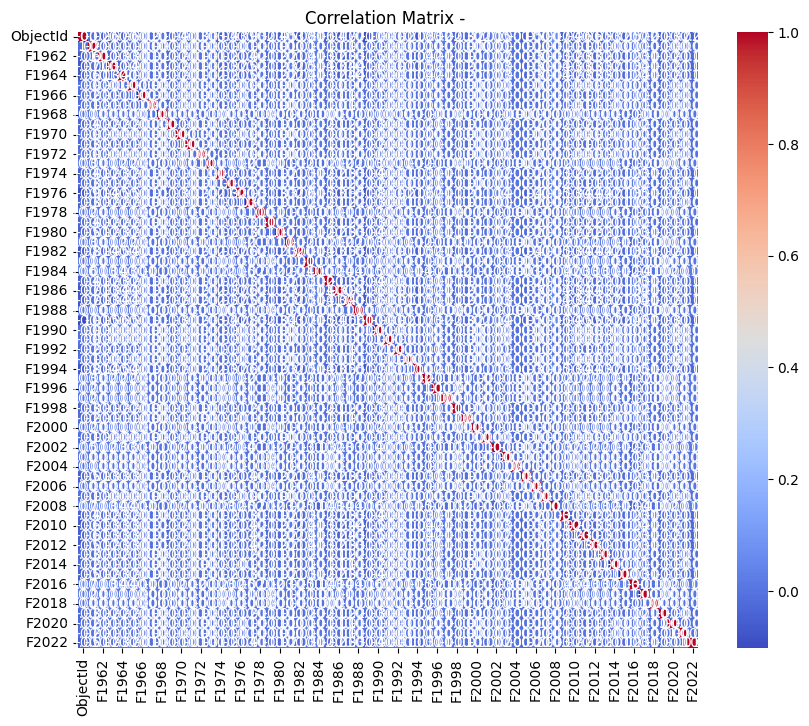

In [13]:
pca_data=pca.transform(scaled_data)
print(pca_score)
plt.figure(figsize=(10, 7))

# Graficar los puntos, diferenciando las clases
plt.figure(figsize=(10,8))
sns.heatmap(pca_score.corr(), 
    annot=True, 
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Matrix - ")
plt.show()

## 10. Métricas de Evaluación del modelo datos de prueba

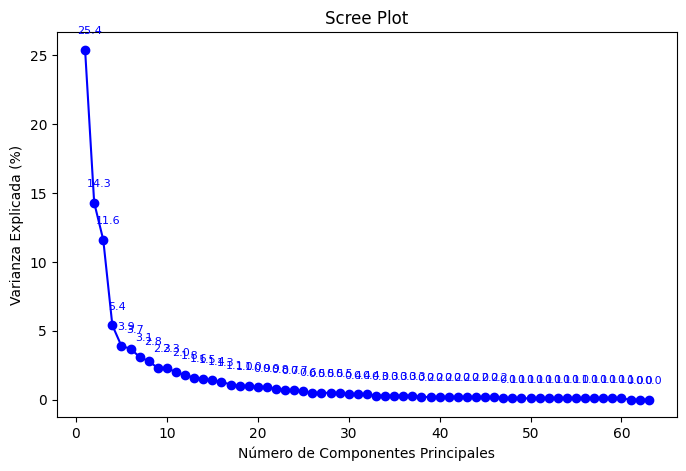

Componente 1: 25.40%
Componente 2: 39.70%
Componente 3: 51.30%
Componente 4: 56.70%
Componente 5: 60.60%
Componente 6: 64.30%
Componente 7: 67.40%
Componente 8: 70.20%
Componente 9: 72.50%
Componente 10: 74.80%
Componente 11: 76.80%
Componente 12: 78.60%
Componente 13: 80.20%
Componente 14: 81.70%
Componente 15: 83.10%
Componente 16: 84.40%
Componente 17: 85.50%
Componente 18: 86.50%
Componente 19: 87.50%
Componente 20: 88.40%
Componente 21: 89.30%
Componente 22: 90.10%
Componente 23: 90.80%
Componente 24: 91.50%
Componente 25: 92.10%
Componente 26: 92.60%
Componente 27: 93.10%
Componente 28: 93.60%
Componente 29: 94.10%
Componente 30: 94.50%
Componente 31: 94.90%
Componente 32: 95.30%
Componente 33: 95.60%
Componente 34: 95.90%
Componente 35: 96.20%
Componente 36: 96.50%
Componente 37: 96.80%
Componente 38: 97.00%
Componente 39: 97.20%
Componente 40: 97.40%
Componente 41: 97.60%
Componente 42: 97.80%
Componente 43: 98.00%
Componente 44: 98.20%
Componente 45: 98.40%
Componente 46: 98.6

In [ ]:



#%%Porcentaje de varianza explicada por cada componente principal proporciona
#Lambda/suma_Lambda (valor_propio/suma_valores_propios)
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)

#Scree plot para visualizar el porcentaje de varianza explicada
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(per_var) + 1), per_var, marker='o', linestyle='-', color='b')

for i, var in enumerate(per_var):
    plt.text(i + 1.5, var + 1,f"{var:.1f}", ha='center', va='bottom', fontsize=8, color="blue")
    
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada (%)')
plt.title('Scree Plot')
plt.show()

#%% Porcentaje de varianza acumulada

porcent_acum = np.cumsum(per_var)
porcent_acum = np.minimum(porcent_acum, 100)  # Limita el máximo valor acumulado a 100%

# Impresión de resultados
for i, valor in enumerate(porcent_acum, start=1):
    print(f"Componente {i}: {valor:.2f}%")

#Selección del número de componentes principales
threshold = 85  # umbral deseado
n_components = np.argmax(porcent_acum >= threshold) + 1
print(f"Número de componentes necesarios para capturar el {threshold}% de la varianza: {n_components}")